# box for importing packages

In [1]:
using DataFrames
using StatsBase
using PyPlot
using Distributions
using DelimitedFiles
using HypothesisTests

# some functions

In [2]:
function sample(N)
    sample = zeros(Int64, N)
    for i in 1:N
        sample[i] = FD[Int(floor(3353*rand()))]
    end
    return sample
end

BLdist(d) =log(10, 1 + 1/d)

BLdist (generic function with 1 method)

# initialising data

In [3]:
LS = (readdlm("companylist.csv", ','))[:, 3]; #last sale
LSF = filter((LS) -> eltype(LS) == Float64, LS); #last sale filtered
FD = [d[end] for d in digits.(Int.(floor.(LSF.*1000)))]; #first digits

# plot of histogram and uniform/benford

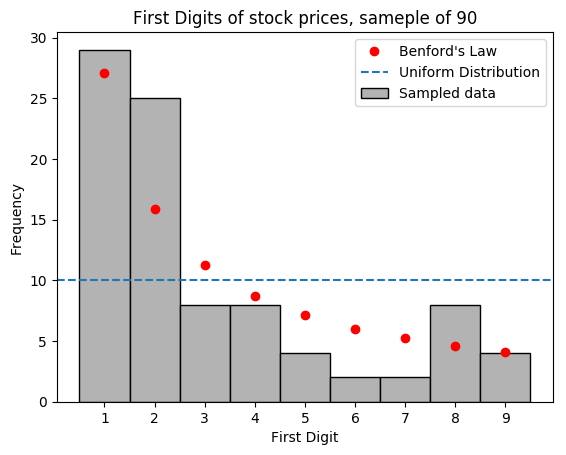

PyObject Text(0.5, 1.0, 'First Digits of stock prices, sameple of 90')

In [4]:
sample90 = sample(90)

x = 1:9
BL = BLdist.(x)
# y = 0:10
uniform = zeros(9) .+ 1/9 

# figure(figsize = (20, 8))

data90 = Int.((plt[:hist](sample90, bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], normed = 0, color = "0.7", 
            label = "Sampled data", align = "left", edgecolor = "0"))[1])

plot(x, sum(data90)*BL, marker = "o", color = "r", linestyle = "none", label = "Benford's Law")
axhline(sum(data90)/9, linestyle = "--", label = "Uniform Distribution")
legend()
xticks(1:9)
xlabel("First Digit")
ylabel("Frequency")
title("First Digits of stock prices, sameple of 90")

# $\chi ^2$  test against uniform distribution

In [5]:
ChisqTest(data90, uniform)

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.111111, 0.111111, 0.111111, 0.111111, 0.111111, 0.111111, 0.111111, 0.111111, 0.111111]
    point estimate:          [0.322222, 0.277778, 0.0888889, 0.0888889, 0.0444444, 0.0222222, 0.0222222, 0.0888889, 0.0444444]
    95% confidence interval: Tuple{Float64,Float64}[(0.2222, 0.4261), (0.1778, 0.3816), (0.0, 0.1928), (0.0, 0.1928), (0.0, 0.1483), (0.0, 0.1261), (0.0, 0.1261), (0.0, 0.1928), (0.0, 0.1483)]

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-13

Details:
    Sample size:        90
    statistic:          79.80000000000001
    degrees of freedom: 8
    residuals:          [6.00833, 4.74342, -0.632456, -0.632456, -1.89737, -2.52982, -2.52982, -0.632456, -1.89737]
    std. residuals:     [6.37279, 5.03115, -0.67082, -0.67082, -2.01246, -2.68328, -2.68328, -0.67082, -2.01246]


# $\chi ^2$ test against benford's law

In [6]:
ChisqTest(data90, BL)

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.30103, 0.176091, 0.124939, 0.09691, 0.0791812, 0.0669468, 0.0579919, 0.0511525, 0.0457575]
    point estimate:          [0.322222, 0.277778, 0.0888889, 0.0888889, 0.0444444, 0.0222222, 0.0222222, 0.0888889, 0.0444444]
    95% confidence interval: Tuple{Float64,Float64}[(0.2222, 0.4261), (0.1778, 0.3816), (0.0, 0.1928), (0.0, 0.1928), (0.0, 0.1483), (0.0, 0.1261), (0.0, 0.1261), (0.0, 0.1928), (0.0, 0.1483)]

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.0597

Details:
    Sample size:        90
    statistic:          14.970187349027642
    degrees of freedom: 8
    residuals:          [0.366432, 2.29888, -0.967556, -0.24444, -1.17112, -1.63984, -1.40914, 1.58288, -0.0582331]
    std. residuals:     [0.438292, 2.53266, -1.03432, -0.257221, -1.22043, -1.69765, -1.45186, 1.6249

# increasing sample size to 900

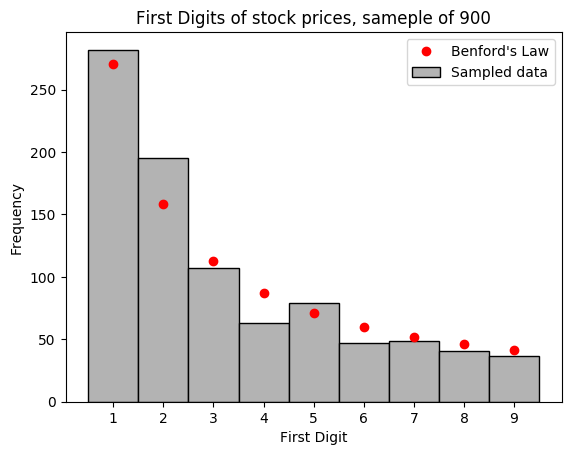

PyObject Text(0.5, 1.0, 'First Digits of stock prices, sameple of 900')

In [7]:
sample900 = sample(900)

data900 = Int.((plt[:hist](sample900, bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], normed = 0, color = "0.7", 
            label = "Sampled data", align = "left", edgecolor = "0"))[1])

plot(x, sum(data900)*BL, marker = "o", color = "r", linestyle = "none", label = "Benford's Law")
legend()
xticks(1:9)
xlabel("First Digit")
ylabel("Frequency")
title("First Digits of stock prices, sameple of 900")

In [8]:
ChisqTest(data900, BL)

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.30103, 0.176091, 0.124939, 0.09691, 0.0791812, 0.0669468, 0.0579919, 0.0511525, 0.0457575]
    point estimate:          [0.313333, 0.216667, 0.118889, 0.07, 0.0877778, 0.0522222, 0.0544444, 0.0455556, 0.0411111]
    95% confidence interval: Tuple{Float64,Float64}[(0.2811, 0.3458), (0.1844, 0.2491), (0.0867, 0.1514), (0.0378, 0.1025), (0.0556, 0.1202), (0.02, 0.0847), (0.0222, 0.0869), (0.0133, 0.078), (0.0089, 0.0736)]

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           0.0078

Details:
    Sample size:        900
    statistic:          20.781707674340403
    degrees of freedom: 8
    residuals:          [0.672728, 2.90078, -0.513472, -2.59329, 0.916502, -1.70726, -0.441937, -0.742404, -0.651636]
    std. residuals:     [0.804656, 3.19577, -0.548906, -2.72889, 0.955094, -1.76744, -0.455337